# Graded Challenge 1 or Milestone 1

Nama    : Muhamad Ivan

Batch   : 13

## Description
Sebagai seorang trainer yang ingin mendominasi Professional League dibutuhkan pokemon - pokemon yang memiliki Total_Stat yang baik. Tentu sebagai seorang trainer tidak membeda-beda kan generasi pokemon. Dalam setiap generasi trainer yang handal harus selalu menemukan pokemon terkuat untuk dilatih. Selain itu dalam setiap pertandingan pro league akan digunakan masing-masing 5 Pokemon. Maka dari itu perlu disiapkan minimal 8 Pokemon dengan 5 pokemon utama dan 3 pokemon cadangan. Kemudian 8 pokemon ini sudah pasti dilaur pokemon legendary yang diketahui bersifat langka dan penggunannya dilarang dalam pro league. Oleh karena itu dapat dijabarkan objective berupa:
### Objective

Mendata Pokemon dengan Total poin tertinggi untuk digunakan ke dalam Pro-League.

### Problem Statement

1. Melakukan pengelompokan pokemon berdasarkan generasi
2. Mencari 8 pokemon terkuat dari tiap generasi
3. Melakukan filter terhadap pokemon legendary
4. Mencari tahu generasi yang memiliki total poin tertinggi



## Working Area



1. Perkenalan
    
    Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

This dataset includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is consist of 13 Column:

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round
- Generation: 
- Legendary:
```


2. Import Pustaka yang dibutuhkan

In [242]:
import numpy as np
import pandas as pd

3. Data Loading

    Bagian ini berisi proses *data loading* yang kemudian dilanjutkan dengan *explorasi data* secara sederhana.     

In [243]:
df = pd.read_csv('Pokemon.csv')
df.head(100)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False


In [244]:
print(df.shape)
print(df.info())

(800, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [245]:
df.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
742,674,Pancham,Fighting,NaN,348,67,82,62,46,48,43,6,False
78,72,Tentacool,Water,Poison,335,40,40,35,50,100,70,1,False
739,671,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False
485,437,Bronzong,Steel,Psychic,500,67,89,116,79,116,33,4,False


Berdasarkan pengamatan awal menggunakan fungsi info diketahui bahwa pada kolom 'Type 2' ditemukan (800-414) = 386 cell yang bernilai Null. Pertama perlu diketahui konteks dari column 'Type 2'. Setelah dicek pada deksripsi kolom diketahui bahwa setiap pokemon pasti memiliki type masing-masing. Diketahui pula bahwa ada pokemon yang hanya memiliki 1 Type dan ada yang memiliki 2 Type sekaligus. 

Diambil contoh pada nomor indeks 581 diketahui pokemon bernama "Swanna" memiliki 2 tipe Type1 = Water & Type2= Flying. Sedangkan Haxorus dengan nomor indeks 612 hanya memiliki 1 tipe yaitu Type1 = Dragon. Maka dari itu pada tahap cleaning perlu dilakukan pembersihan.

4. Data Cleaning

Proses penyiapan data berupa data cleaning sebelum dilakukan *explorasi data* lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [246]:
# Diperlukan copy terhadap file awal
list_pokemon = df.copy()
list_pokemon


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Melakukan copy data agar tidak mengganggu data mentah

In [247]:
# Perlu dilakukan penggantian nama kolom untuk indeks masing-masing pokemon
list_pokemon.rename(columns={'#': 'pokemon_id'}, inplace=True)
list_pokemon.set_index('pokemon_id', inplace=True)
list_pokemon


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
pokemon_id,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Mengganti nomor urut menjadi pokemon_id. Hal ini dilakukan karena diketahui beberapa pokemon dengan akar sejenis memiliki nomor yang sama. Oleh karena itu akan lebih baik dinamai pokemon_id

In [248]:
# Mengisi missing values dengan 'Netral'
list_pokemon['Type 2'].fillna("Netral", inplace=True)
list_pokemon_rev2 = list_pokemon.drop(labels=['Speed','Sp. Def','Sp. Atk','Defense','Attack', 'HP'], axis =1)
list_pokemon_rev2

,Name,Type 1,Type 2,Total,Generation,Legendary
pokemon_id,,,,,,
1,Bulbasaur,Grass,Poison,318,1,False
2,Ivysaur,Grass,Poison,405,1,False
3,Venusaur,Grass,Poison,525,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,1,False
4,Charmander,Fire,Netral,309,1,False
...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,6,True
719,DiancieMega Diancie,Rock,Fairy,700,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,6,True


Dilakukan pembersihan missing values yang berjumlah 384 dengan menggantikannya menjadi kata "Netral". Kata "Netral" digunakan untuk menjadi pembeda terhadap tipe pokemon lain. Kemudian dilakukan pembersihan terhadap column tidak terpakai seperti, 'Speed','Sp. Def','Sp. Atk','Defense','Attack', 'HP'. Dalam kasus ini kita hanya menggunakan column "Total" karena sudah mewakili keseluruhan kekuatan masing-masing pokemon.

In [249]:
list_pokemon_final=list_pokemon_rev2[list_pokemon_rev2.Legendary == False]
list_pokemon_final.head()

,Name,Type 1,Type 2,Total,Generation,Legendary
pokemon_id,,,,,,
1,Bulbasaur,Grass,Poison,318,1,False
2,Ivysaur,Grass,Poison,405,1,False
3,Venusaur,Grass,Poison,525,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,1,False
4,Charmander,Fire,Netral,309,1,False


Dilakukan penyisihan terhadap pokemon-pokemon "Legendary" karena diketahui bahwa dalam pro league dilarang menggunakan pokemon legendary.

5. Explorasi Data

    Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.
    
    Mencari 8 Pokemon terkuat di semua generasi

In [250]:
# Query Generasi I
pokemon_ivan_I=list_pokemon_final.loc[list_pokemon_final['Generation']==1][['Name','Type 1', 'Type 2', 'Total','Generation' ]].sort_values(by=['Total'], ascending=False).head(8)
pokemon_ivan_I

,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
130,GyaradosMega Gyarados,Water,Dark,640,1
6,CharizardMega Charizard X,Fire,Dragon,634,1
6,CharizardMega Charizard Y,Fire,Flying,634,1
9,BlastoiseMega Blastoise,Water,Netral,630,1
3,VenusaurMega Venusaur,Grass,Poison,625,1
142,AerodactylMega Aerodactyl,Rock,Flying,615,1
151,Mew,Psychic,Netral,600,1
94,GengarMega Gengar,Ghost,Poison,600,1


8 Pokemon terkuat dari generasi I

In [251]:
# Query Generasi II
pokemon_ivan_II=list_pokemon_final.loc[list_pokemon_final['Generation']==2][['Name','Type 1', 'Type 2', 'Total','Generation' ]].sort_values(by=['Total'], ascending=False).head(8)
pokemon_ivan_II

,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
248,TyranitarMega Tyranitar,Rock,Dark,700,2
208,SteelixMega Steelix,Steel,Ground,610,2
181,AmpharosMega Ampharos,Electric,Dragon,610,2
251,Celebi,Psychic,Grass,600,2
229,HoundoomMega Houndoom,Dark,Fire,600,2
248,Tyranitar,Rock,Dark,600,2
214,HeracrossMega Heracross,Bug,Fighting,600,2
212,ScizorMega Scizor,Bug,Steel,600,2


8 Pokemon terkuat dari generasi II

In [252]:
# Query Generasi III
pokemon_ivan_III=list_pokemon_final.loc[list_pokemon_final['Generation']==3][['Name','Type 1', 'Type 2', 'Total','Generation' ]].sort_values(by=['Total'], ascending=False).head(8)
pokemon_ivan_III

,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
376,MetagrossMega Metagross,Steel,Psychic,700,3
373,SalamenceMega Salamence,Dragon,Flying,700,3
289,Slaking,Normal,Netral,670,3
260,SwampertMega Swampert,Water,Ground,635,3
254,SceptileMega Sceptile,Grass,Dragon,630,3
306,AggronMega Aggron,Steel,Netral,630,3
257,BlazikenMega Blaziken,Fire,Fighting,630,3
282,GardevoirMega Gardevoir,Psychic,Fairy,618,3


8 Pokemon terkuat dari generasi III

In [253]:
# Query Generasi IV
pokemon_ivan_IV=list_pokemon_final.loc[list_pokemon_final['Generation']==4][['Name','Type 1', 'Type 2', 'Total','Generation' ]].sort_values(by=['Total'], ascending=False).head(8)
pokemon_ivan_IV

,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
445,GarchompMega Garchomp,Dragon,Ground,700,4
448,LucarioMega Lucario,Fighting,Steel,625,4
475,GalladeMega Gallade,Psychic,Fighting,618,4
490,Manaphy,Water,Netral,600,4
445,Garchomp,Dragon,Ground,600,4
488,Cresselia,Psychic,Netral,600,4
460,AbomasnowMega Abomasnow,Grass,Ice,594,4
428,LopunnyMega Lopunny,Normal,Fighting,580,4


8 Pokemon terkuat dari generasi IV

In [254]:
# Query Generasi V
pokemon_ivan_V=list_pokemon_final.loc[list_pokemon_final['Generation']==5][['Name','Type 1', 'Type 2', 'Total','Generation' ]].sort_values(by=['Total'], ascending=False).head(8)
pokemon_ivan_V

,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
649,Genesect,Bug,Steel,600,5
635,Hydreigon,Dark,Dragon,600,5
648,MeloettaPirouette Forme,Normal,Fighting,600,5
648,MeloettaAria Forme,Normal,Psychic,600,5
647,KeldeoResolute Forme,Water,Fighting,580,5
647,KeldeoOrdinary Forme,Water,Fighting,580,5
567,Archeops,Rock,Flying,567,5
637,Volcarona,Bug,Fire,550,5


8 Pokemon terkuat dari generasi V

In [255]:
# Query Generasi VI
pokemon_ivan_VI=list_pokemon_final.loc[list_pokemon_final['Generation']==6][['Name','Type 1', 'Type 2', 'Total','Generation' ]].sort_values(by=['Total'], ascending=False).head(8)
pokemon_ivan_VI

,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
706,Goodra,Dragon,Netral,600,6
671,Florges,Fairy,Netral,552,6
715,Noivern,Flying,Dragon,535,6
655,Delphox,Fire,Psychic,534,6
673,Gogoat,Grass,Netral,531,6
652,Chesnaught,Grass,Fighting,530,6
658,Greninja,Water,Dark,530,6
700,Sylveon,Fairy,Netral,525,6


8 Pokemon terkuat dari generasi VI

In [256]:
# Kumpulan Pokemon Koleksi Ivan
pokemon_ivan_final=pd.concat([pokemon_ivan_VI,pokemon_ivan_V,pokemon_ivan_IV,pokemon_ivan_III,pokemon_ivan_II,pokemon_ivan_I])
pokemon_ivan_final.head()


,Name,Type 1,Type 2,Total,Generation
pokemon_id,,,,,
706,Goodra,Dragon,Netral,600,6
671,Florges,Fairy,Netral,552,6
715,Noivern,Flying,Dragon,535,6
655,Delphox,Fire,Psychic,534,6
673,Gogoat,Grass,Netral,531,6


Dilakukan penggabungan terhadap seluruh list tersebut guna menciptakan master list yang berisi seluruh pokemon yang Trainer Ivan butuhkan

Menggunakan dataframes = 'pokemon_ivan_final' telah terkumpul 48 pokemon terkuat dari masing-masing generasi. 

In [257]:
# Grouping pokemon_ivan_final untuk mengetahui generasi mana yang memiliki Total poin terkuat

grouping_I = pokemon_ivan_final.groupby(by='Generation')[['Total']].sum().sort_values(by='Total',ascending=False).head(6)
grouping_I


,Total
Generation,
3,5213
1,4978
2,4920
4,4917
5,4677
6,4337


Dapat diambil kesimpulan bahwa berdasarkan kumpulan Pokemon terkuat dari berbagai generasi. Generasi terkuat hingga terlemah berturut yaitu 3,1,2,4,5 dan 6

In [258]:
# Grouping II, diketahui terdapat pokemon yang memiliki 2 tipe dan 1 tipe. Dari list pokemon terkuat ini dapat diketahui jumlah pokemon 
# yang memiliki 2 tipe dan 1 tipe. 

grouping_II=pokemon_ivan_final.groupby(by='Type 2')[['Total']].count().sort_values(by='Total',ascending=False)  
grouping_II.head()



,Total
Type 2,
Netral,10
Fighting,8
Dragon,5
Dark,4
Flying,4


Diketahui bahwa terdapat 10 pokemon yang memiliki 1 tipe elemen. Sedangkan 38 pokemon lainnya memiliki 2 tipe elemen

In [259]:
# Grouping III, berdasarkan data yang kita miliki kita dapat mengetahui 5 tipe pokemon dengan rata-rata power tertinggi

grouping_III=pokemon_ivan_final.groupby(by='Type 1')[['Total']].mean().sort_values(by='Total',ascending=False)  
grouping_III

,Total
Type 1,
Dragon,650.000000
Steel,646.666667
Fighting,625.000000
Rock,620.500000
Normal,612.500000
Electric,610.000000
Fire,608.000000
Psychic,607.200000
Dark,600.000000


Berdasarkan hasil grouping diketahui bahwa pokemon dengan rata-rata total kekuatan tertinggi dicapai oleh pokemon dengan tipe 'Dragon'

<AxesSubplot:ylabel='Generation'>

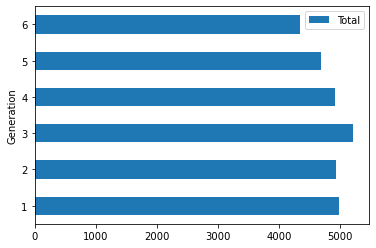

In [260]:
# Panda Visualisasi

grouping_I.sort_index().plot(kind="barh")


Berikut penggambaran peta kekuatan pokemon Trainer Ivan jika diklasifikasikan berdasarkan generasi. Generasi ketiga adalah yang terkuat, diikuti generasi 1,2, dan 4 secara tipis. Sedangkan generasi 5 dan generasi 6 mengalami penurunan yang signifikan.

array([<AxesSubplot:ylabel='Total'>], dtype=object)

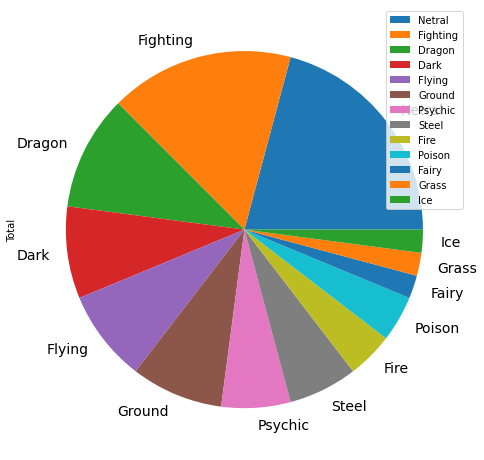

In [261]:
grouping_II.plot.pie(subplots=True,figsize=(8,10),fontsize=14)

Jika data "Netral" dikeluarkan, makan tipe pokemon yang paling banyak harus dimiliki oleh trainer Ivan adalah pokemon bertipe Fighting dan yang paling sedikit adalah ice.

<AxesSubplot:xlabel='Type 1'>

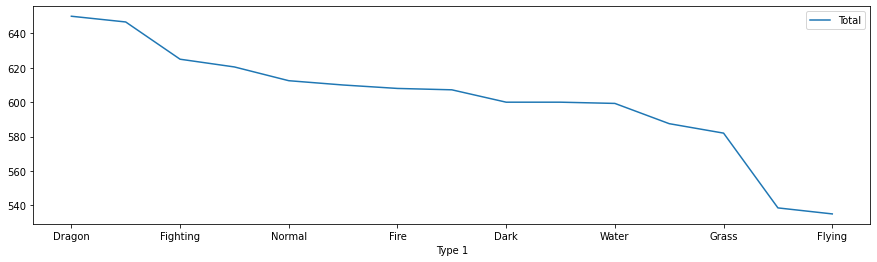

In [262]:
grouping_III.plot(kind='line',figsize=(15,4))

Berdasarkan data di atas dapat diketahui tipe pokemon dengan rata-rata kekuatan tertinggi adalah pokemon dengan tipe dragon dan pokemon dengan rata-rata kekuatana terendah adalah flying. Hal ini menandakan pokemon dengan tipe dragon akan menjadi prioritas yang akan dimainkan terlebih dahulu oleh Trainer Ivan

## Conclusions, Assumptions, Overall Analysis

Setelah dilakukan pengolahan data ditemukan 48 Pokemon yang tersusun dari 8 pokemon terkuat dari tiap-tiap generasi. Dari 48 pokemon ini ditemukan 38 pokemon memiliki dual-type dan 10 pokemon memiliki 1 type. Apabila dibandingkan Total kekuatan masing-masing generasi ditemukan generasi dengan Total tertinggi adalah generasi ketiga dan terlemah adalah generasi keenam. Oleh karena itu berbekal data yang sudah diolah ini, Trainer pokemon bernama Ivan sudah boleh mencari pokemon-pokemon pada list tersebut untuk digunakan dalam pertandingan Profesional League.